### **1. Importing Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### **2. Collecting the Data**

In [2]:
df=pd.read_csv("Global_Development_Mesaurement.csv")
df.head()

,Country,BirthRate,BusinessTaxRate,CO2Emissions,GDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,MobilePhoneUsage,PopulationTotal,Cluster
0,Algeria,0.020,49.051656,87931,5.479006e+10,60,0.034,0.0,0.100,71,0.0,31719449,1
1,Angola,0.050,49.051656,9542,9.129595e+09,22,0.020,0.0,0.119,47,0.0,13924930,0
2,Benin,0.043,49.051656,1617,2.359122e+09,15,0.090,0.0,0.119,57,0.0,6949366,0
3,Botswana,0.027,49.051656,4276,5.788312e+09,152,0.054,0.0,0.155,52,0.1,1755375,0
4,Burkina Faso,0.046,49.051656,1041,2.610959e+09,12,0.096,0.0,0.119,52,0.0,11607944,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2678 non-null   object 
 1   BirthRate             2678 non-null   float64
 2   BusinessTaxRate       2678 non-null   float64
 3   CO2Emissions          2678 non-null   int64  
 4   GDP                   2678 non-null   float64
 5   HealthExpCapita       2678 non-null   int64  
 6   InfantMortalityRate   2678 non-null   float64
 7   InternetUsage         2678 non-null   float64
 8   LendingInterest       2678 non-null   float64
 9   LifeExpectancyFemale  2678 non-null   int64  
 10  MobilePhoneUsage      2678 non-null   float64
 11  PopulationTotal       2678 non-null   int64  
 12  Cluster               2678 non-null   int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 272.1+ KB


In [4]:
df.describe()

,BirthRate,BusinessTaxRate,CO2Emissions,GDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,MobilePhoneUsage,PopulationTotal,Cluster
count,2678.000000,2678.000000,2678.000000,2.678000e+03,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2.678000e+03,2678.000000
mean,0.022636,46.361655,14001.974981,2.922840e+10,227.088872,0.030280,0.232076,0.117163,71.304332,0.574010,8.629123e+06,1.089993
std,0.011145,6.094496,19982.979208,4.594564e+10,236.659818,0.026869,0.254885,0.038099,10.496188,0.462308,1.060294e+07,0.901854
min,0.007000,27.500000,7.000000,6.310127e+07,2.000000,0.002000,0.000000,0.018000,39.000000,0.000000,1.887600e+04,0.000000
25%,0.013000,45.500000,2212.000000,4.118366e+09,57.000000,0.010000,0.000000,0.098000,65.000000,0.200000,9.671408e+05,0.000000
50%,0.020000,49.051656,8529.000000,1.549332e+10,193.000000,0.020000,0.100000,0.119000,75.000000,0.500000,5.967926e+06,1.000000
75%,0.030000,49.051656,8732.250000,2.289207e+10,245.750000,0.047750,0.400000,0.124000,79.000000,0.900000,1.043498e+07,2.000000
max,0.053000,61.900000,104443.000000,2.273590e+11,1308.000000,0.110000,1.000000,0.229000,87.000000,2.900000,4.926131e+07,2.000000


In [5]:
df.isnull().sum()

Country                 0
BirthRate               0
BusinessTaxRate         0
CO2Emissions            0
GDP                     0
HealthExpCapita         0
InfantMortalityRate     0
InternetUsage           0
LendingInterest         0
LifeExpectancyFemale    0
MobilePhoneUsage        0
PopulationTotal         0
Cluster                 0
dtype: int64

In [6]:
df.shape

(2678, 13)

In [7]:
df_num=df.iloc[:,1:-1]
df_num.head()

,BirthRate,BusinessTaxRate,CO2Emissions,GDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,MobilePhoneUsage,PopulationTotal
0,0.020,49.051656,87931,5.479006e+10,60,0.034,0.0,0.100,71,0.0,31719449
1,0.050,49.051656,9542,9.129595e+09,22,0.020,0.0,0.119,47,0.0,13924930
2,0.043,49.051656,1617,2.359122e+09,15,0.090,0.0,0.119,57,0.0,6949366
3,0.027,49.051656,4276,5.788312e+09,152,0.054,0.0,0.155,52,0.1,1755375
4,0.046,49.051656,1041,2.610959e+09,12,0.096,0.0,0.119,52,0.0,11607944


### **3. Data Transformation**

In [8]:
column_names = df.columns[1:-1]

ss = StandardScaler()
df_num = ss.fit_transform(df_num)  # Transform your data

# Create a DataFrame directly with column names
df_num = pd.DataFrame(df_num, columns=column_names)

# Now you can access the data and column names as usual
df_num.head()

,BirthRate,BusinessTaxRate,CO2Emissions,GDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,MobilePhoneUsage,PopulationTotal
0,-0.236596,0.441464,3.700291,0.556450,-0.706162,0.138475,-0.910684,-0.450573,-0.029000,-1.241852,2.178135
1,2.455774,0.441464,-0.223230,-0.437529,-0.866760,-0.382676,-0.910684,0.048221,-2.315971,-1.241852,0.499559
2,1.827554,0.441464,-0.619892,-0.584915,-0.896343,2.223078,-0.910684,0.048221,-1.363067,-1.241852,-0.158453
3,0.391624,0.441464,-0.486804,-0.510265,-0.317345,0.882976,-0.910684,0.993304,-1.839519,-1.025505,-0.648408
4,2.096791,0.441464,-0.648722,-0.579433,-0.909022,2.446429,-0.910684,0.048221,-1.839519,-1.241852,0.280995


In [9]:
df_cat=df[['Country']]
df_cat.head()

,Country
0,Algeria
1,Angola
2,Benin
3,Botswana
4,Burkina Faso


In [10]:
LR=LabelEncoder()
df_cat['Country']=LR.fit_transform(df_cat['Country'])
df_cat.head()

C:\Users\cs833\AppData\Local\Temp\ipykernel_9064\3682062646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Country']=LR.fit_transform(df_cat['Country'])


,Country
0,2
1,5
2,20
3,25
4,29


In [11]:
X=pd.concat([df_num,df_cat], axis=1)
X.head()


,BirthRate,BusinessTaxRate,CO2Emissions,GDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,MobilePhoneUsage,PopulationTotal,Country
0,-0.236596,0.441464,3.700291,0.556450,-0.706162,0.138475,-0.910684,-0.450573,-0.029000,-1.241852,2.178135,2
1,2.455774,0.441464,-0.223230,-0.437529,-0.866760,-0.382676,-0.910684,0.048221,-2.315971,-1.241852,0.499559,5
2,1.827554,0.441464,-0.619892,-0.584915,-0.896343,2.223078,-0.910684,0.048221,-1.363067,-1.241852,-0.158453,20
3,0.391624,0.441464,-0.486804,-0.510265,-0.317345,0.882976,-0.910684,0.993304,-1.839519,-1.025505,-0.648408,25
4,2.096791,0.441464,-0.648722,-0.579433,-0.909022,2.446429,-0.910684,0.048221,-1.839519,-1.241852,0.280995,29


In [12]:
Y=df['Cluster']
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Cluster, dtype: int64

### **4. Data Partition**

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

### **5. Model Building**

#### **1. Logistic Regression**

In [14]:
model = LogisticRegression()

model.fit(x_train, y_train)

c:\Program Files\Python311\Scripts\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9302788844621513
Testing Accuracy: 0.9298507462686567


### **6. Data Validation**

In [16]:
training_acc = []
test_acc = []

for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))

Logistic_train_acc = round(np.mean(training_acc), 2)
Logistic_test_acc = round(np.mean(test_acc), 2)

print("Cross validation - Training accuracy:", Logistic_train_acc)
print("Cross validation - Test accuracy:", Logistic_test_acc)

c:\Program Files\Python311\Scripts\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Scripts\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Cross validation - Training accuracy: 0.93
Cross validation - Test accuracy: 0.93


c:\Program Files\Python311\Scripts\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Scripts\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

#### **2. Decision Tree Classifier**

In [17]:
dt= DecisionTreeClassifier(criterion='gini',max_depth=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [18]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9887940234791889
Testing Accuracy: 0.9241293532338308


In [19]:
training_acc = []
test_acc = []

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt.fit(x_train.values,y_train)
    y_pred_train = dt.predict(x_train.values)
    y_pred_test  = dt.predict(x_test.values)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))

dt_train_acc = np.mean(training_acc).round(2)
dt_test_acc = np.mean(test_acc).round(2)

import numpy as np
print("Cross validation - Training accuracy:", dt_train_acc)
print("Cross validation - Test accuracy:", dt_test_acc)

Cross validation - Training accuracy: 0.99
Cross validation - Test accuracy: 0.94


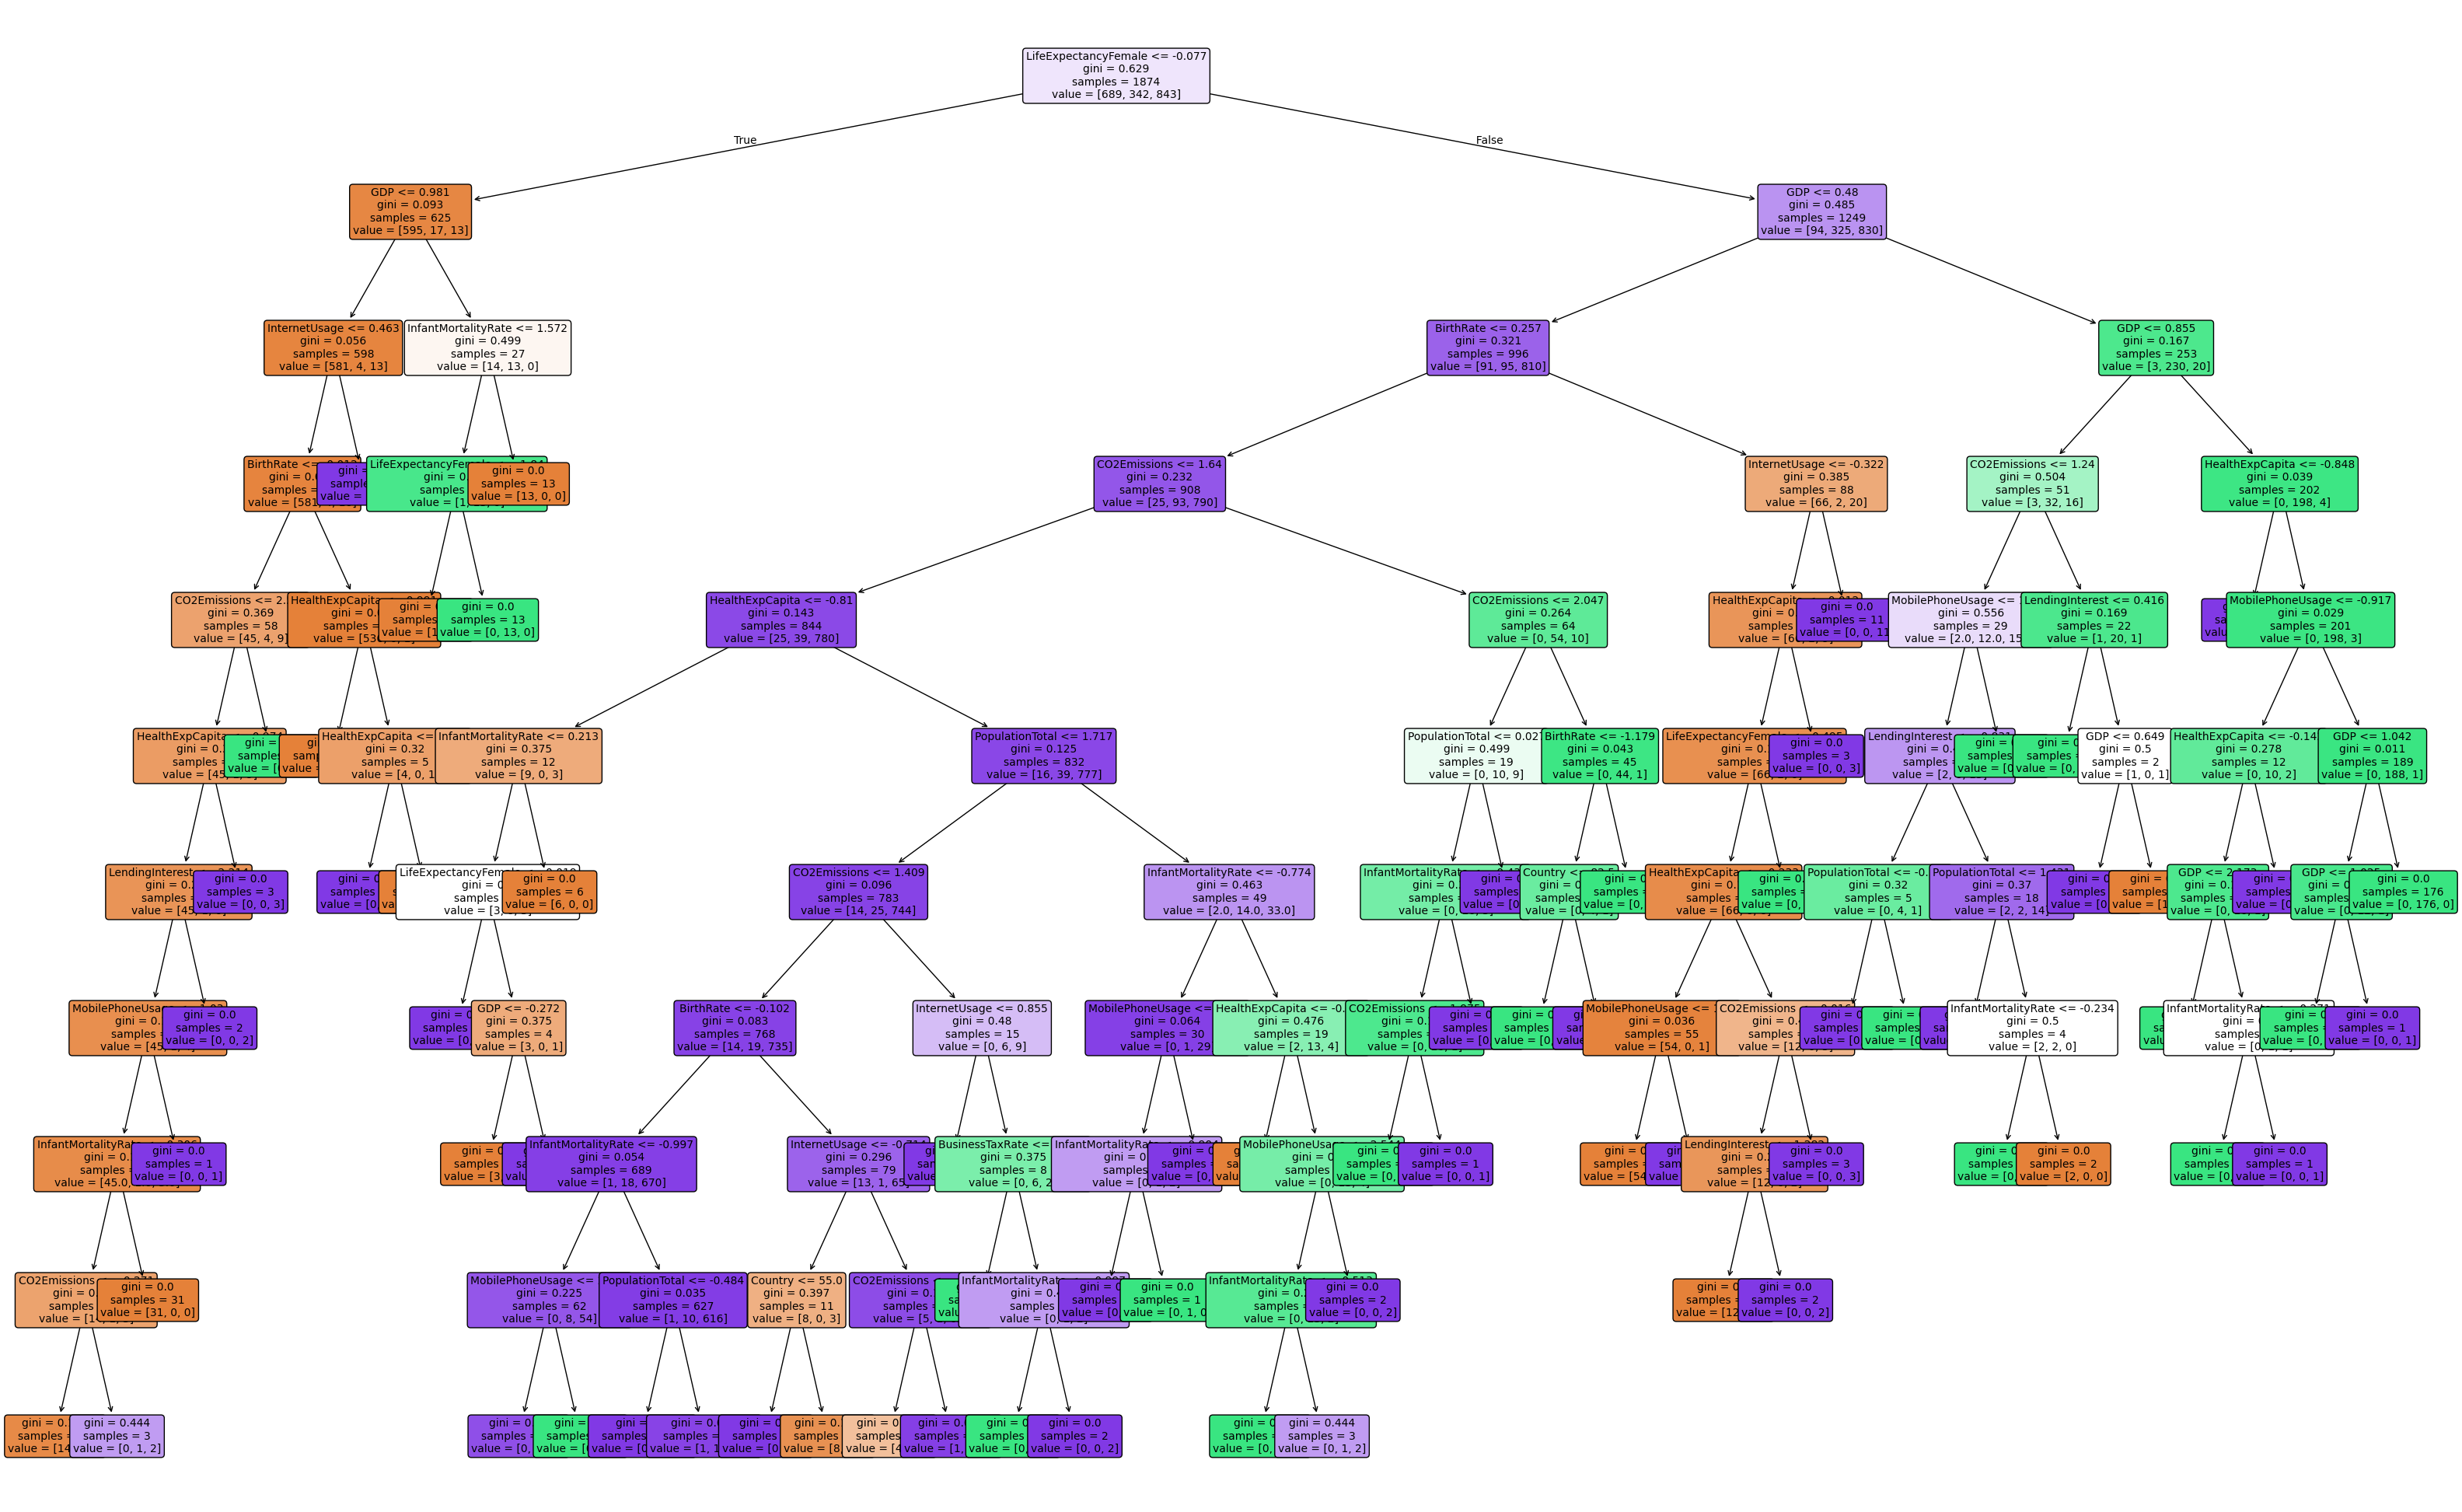

In [20]:
plt.figure(figsize=(40, 25))

tree.plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [21]:
node_count = dt.tree_.node_count

# Count the depth of the tree
max_depth = dt.tree_.max_depth

print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)

Number of nodes: 137
Depth of tree: 10


#### **3. Bagging Classifier**

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

model = BaggingClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Y_pred_train = best_model.predict(x_train)
Y_pred_test = best_model.predict(x_test)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Compute Accuracy score for training set
train_acc = accuracy_score(y_train, Y_pred_train)
print(f"Training accuracy: {train_acc:.3f}")

# Compute Accracy score for testing set
test_acc = accuracy_score(y_test, Y_pred_test)
print(f"Testing accuracy: {test_acc:.3f}")

Best Hyperparameters:
{'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 100}
Training accuracy: 0.999
Testing accuracy: 0.961


In [23]:
dt = DecisionTreeClassifier(criterion='gini')
bagging = BaggingClassifier(estimator=dt, n_estimators=200, max_samples=0.7, max_features=0.8,random_state=42)
bagging.fit(x_train, y_train)

y_pred_train = bagging.predict(x_train)
y_pred_test = bagging.predict(x_test)

Bagging_train_acc = round(accuracy_score(y_train, y_pred_train), 2)
Bagging_test_acc = round(accuracy_score(y_test, y_pred_test), 2)

print("Bagging - Training Accuracy:", Bagging_train_acc)
print("Bagging - Testing Accuracy:", Bagging_test_acc)

Bagging - Training Accuracy: 1.0
Bagging - Testing Accuracy: 0.96


#### **4. RandomForest Classifier**

**Grid SearchCV for RandomForest Classifier**

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.6, 0.7, 0.8],
    'criterion': ['gini', 'entropy', 'log_loss']
}

RF = RandomForestClassifier()
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Y_pred_train = best_model.predict(x_train)
Y_pred_test = best_model.predict(x_test)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Compute Accuracy score for training set
train_acc = round(accuracy_score(y_train, Y_pred_train), 3)
print(f"Training accuracy: {train_acc:.3f}")

# Compute Accracy score for testing set
test_acc = round(accuracy_score(y_test, Y_pred_test), 2)
print(f"Testing accuracy: {test_acc:.3f}")

Best Hyperparameters:
{'criterion': 'log_loss', 'max_samples': 0.8, 'n_estimators': 100}
Training accuracy: 1.000
Testing accuracy: 0.960


In [25]:
RF = RandomForestClassifier(criterion='gini', n_estimators=100, max_samples=0.7, max_features=0.7,random_state=42)
RF.fit(x_train, y_train)

y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

from sklearn.metrics import accuracy_score
RF_train_acc = accuracy_score(y_train, y_pred_train)
RF_test_acc = accuracy_score(y_test, y_pred_test)

print("RF - Training Accuracy:", round(RF_train_acc, 2))
print("RF - Testing Accuracy:", round(RF_test_acc, 2))

RF - Training Accuracy: 1.0
RF - Testing Accuracy: 0.96


#### **5. Support Vector Classifier**

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.20, random_state=10)
#model fitting, (kernel='linear')

from sklearn.svm import SVC
model=SVC(kernel='linear')
#model=SVC(kernel='poly',degree=2)
#model=SVC(kernel='rbf',gamma='scale')
model.fit(x_train,y_train)

#predicting 

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

#metrics

SVC_train_acc= accuracy_score(y_train, y_train_pred)
print("Training Accuaracy Score:",round(SVC_train_acc, 2))
SVC_test_acc= accuracy_score(y_test, y_test_pred)
print("Test Accuaracy Score:", round(SVC_test_acc, 2))

Training Accuaracy Score: 0.94
Test Accuaracy Score: 0.94


In [27]:
Accuracies = {'Model': ['Logistic Regression', 'Decision Tree CLassifier', 'Bagging Classifier', 'Random Forest Classifier', 'Support Vector Classifier'],
        'Train Accuracy': [Logistic_train_acc, dt_train_acc, Bagging_train_acc, RF_train_acc, SVC_train_acc],
        'Test Accuracy': [Logistic_test_acc, dt_test_acc, Bagging_test_acc, RF_test_acc, SVC_test_acc]}

acc = pd.DataFrame(Accuracies)
acc.head()

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.930000,0.930000
1,Decision Tree CLassifier,0.990000,0.940000
2,Bagging Classifier,1.000000,0.960000
3,Random Forest Classifier,0.997866,0.963930
4,Support Vector Classifier,0.936508,0.940299


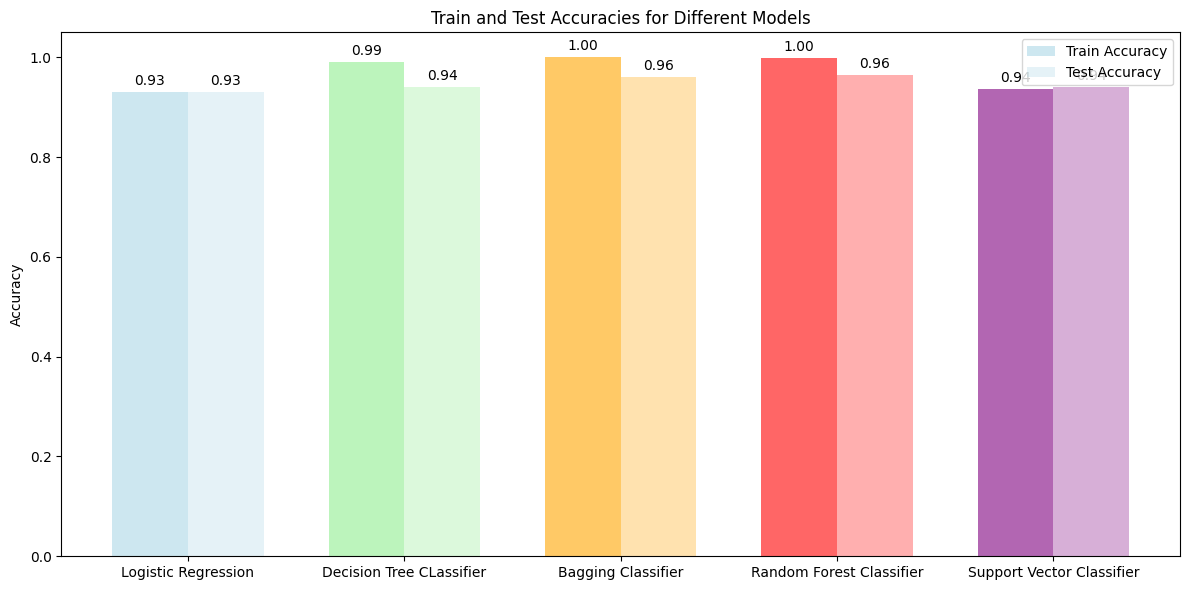

In [28]:
# Plotting using Matplotlib with data labels (similar to previous example)
x = np.arange(len(acc['Model']))
width = 0.35

colors = ['#add8e650', '#90ee9050', '#ffa50050', '#ff000050', '#80008050']

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, acc['Train Accuracy'], width, label='Train Accuracy', color = [c[:-2] + "99" for c in colors])
rects2 = ax.bar(x + width/2, acc['Test Accuracy'], width, label='Test Accuracy', color=[c for c in colors])

ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracies for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(acc['Model'])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()
plt.show()


### **Final Model**

In [29]:
RF = RandomForestClassifier(criterion='gini', n_estimators=100, max_samples=0.7, max_features=0.7,random_state=42)
RF.fit(x_train, y_train)

y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

from sklearn.metrics import accuracy_score
RF_train_acc = accuracy_score(y_train, y_pred_train)
RF_test_acc = accuracy_score(y_test, y_pred_test)

print("RF - Training Accuracy:", round(RF_train_acc, 2))
print("RF - Testing Accuracy:", round(RF_test_acc, 2))

RF - Training Accuracy: 1.0
RF - Testing Accuracy: 0.96


In [30]:
import pickle

with open('model.pkl','wb') as file:
    pickle.dump(RF,file)

with open('scaler.pkl','wb') as file:
    pickle.dump(ss,file)

with open('label.pkl','wb') as file:
    pickle.dump(LR,file)